# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [453]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [454]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [455]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [456]:
df_hh_income.shape

(29322, 3)

In [457]:
df_pct_poverty.shape

(29329, 3)

In [458]:
df_pct_completed_hs.shape

(29329, 3)

In [459]:
df_share_race_city.shape

(29268, 7)

In [460]:
df_fatalities.shape

(2535, 14)

In [461]:
df_hh_income.sample(2)

,Geographic Area,City,Median Income
25170,TX,Hewitt city,70348
23918,SD,McLaughlin city,35667


In [462]:
df_pct_poverty.sample(2)

,Geographic Area,City,poverty_rate
18152,NC,Caswell Beach town,7.8
12688,MN,Gaylord city,12


In [463]:
df_pct_completed_hs.sample(2)

,Geographic Area,City,percent_completed_hs
24242,TN,Friendship city,72.9
26721,VT,Woodstock village,96.9


In [464]:
df_share_race_city.sample(2)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
11201,MD,Linthicum CDP,89,3.7,0.3,4.2,2.7
25402,TX,Los Arrieros CDP,100,0,0,0,86.8


In [465]:
df_fatalities.sample(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1480,1670,Barry Prak,28/06/16,shot,knife,27.00,M,A,Long Beach,CA,False,other,Foot,False
334,447,Michael Asher,03/05/15,shot,gun,53.00,M,W,Chavies,KY,False,attack,Not fleeing,False


In [466]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [467]:
df_pct_poverty.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [468]:
df_pct_completed_hs.isna().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [469]:
df_share_race_city.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [470]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [471]:
df_hh_income.duplicated().sum()

0

In [472]:
df_pct_poverty.duplicated().sum()

0

In [473]:
df_pct_completed_hs.duplicated().sum()

0

In [474]:
df_share_race_city.duplicated().sum()

0

In [475]:
df_fatalities.duplicated().sum()

0

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [476]:
df_hh_income = df_hh_income.fillna(0) 
df_hh_income.isna().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

In [477]:
df_fatalities = df_fatalities.fillna(0)
df_fatalities.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [478]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.replace("-","0")
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10
2,AL,Adamsville city,25.50
3,AL,Addison town,30.70
4,AL,Akron town,42.00
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.60
29325,WY,Worland city,15.30
29326,WY,Wright town,5.90
29327,WY,Yoder town,5.40


In [479]:
poverty_rate_per_state = df_pct_poverty.groupby(["Geographic Area"]).agg({"poverty_rate":"mean"}).sort_values("poverty_rate")
poverty_rate_per_state

,poverty_rate
Geographic Area,
NJ,8.16
WY,9.06
CT,9.14
MA,9.55
MD,10.27
RI,10.37
NY,11.64
UT,11.72
ND,12.13


In [480]:
bar = px.bar(x = poverty_rate_per_state.index,y = poverty_rate_per_state.poverty_rate,title='Poverty Rate in each US State',color_continuous_scale='Agsunset',hover_name=poverty_rate_per_state.poverty_rate,color=poverty_rate_per_state.poverty_rate)
 
bar.update_layout(xaxis_title='US States',yaxis_title='Poverty Rate',coloraxis_showscale=False)
 
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [481]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.replace("-","0")
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.20
1,AL,Abbeville city,69.10
2,AL,Adamsville city,78.90
3,AL,Addison town,81.40
4,AL,Akron town,68.60
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100.00
29325,WY,Worland city,85.60
29326,WY,Wright town,89.20
29327,WY,Yoder town,79.40


In [482]:
graduation_rate_per_state = df_pct_completed_hs.groupby(["Geographic Area"]).agg({"percent_completed_hs":"mean"}).sort_values("percent_completed_hs")
graduation_rate_per_state

,percent_completed_hs
Geographic Area,
TX,74.09
MS,78.47
GA,78.63
NM,78.97
LA,79.12
AZ,79.22
AR,79.95
AK,80.10
AL,80.16


In [483]:
bar = px.bar(x = graduation_rate_per_state.index,y = graduation_rate_per_state.percent_completed_hs,title='Graduation Rate in each US State',color_continuous_scale='Agsunset',hover_name=graduation_rate_per_state.percent_completed_hs,color=graduation_rate_per_state.percent_completed_hs)
 
bar.update_layout(xaxis_title='US States',yaxis_title='Graduation Rate',coloraxis_showscale=False)
 
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [484]:
poverty_and_graduation = poverty_rate_per_state

In [485]:
poverty_and_graduation["graduation_rate"] = graduation_rate_per_state.percent_completed_hs

In [486]:
poverty_and_graduation

,poverty_rate,graduation_rate
Geographic Area,,
NJ,8.16,90.52
WY,9.06,83.97
CT,9.14,91.59
MA,9.55,92.03
MD,10.27,88.08
RI,10.37,88.82
NY,11.64,90.54
UT,11.72,89.64
ND,12.13,87.60


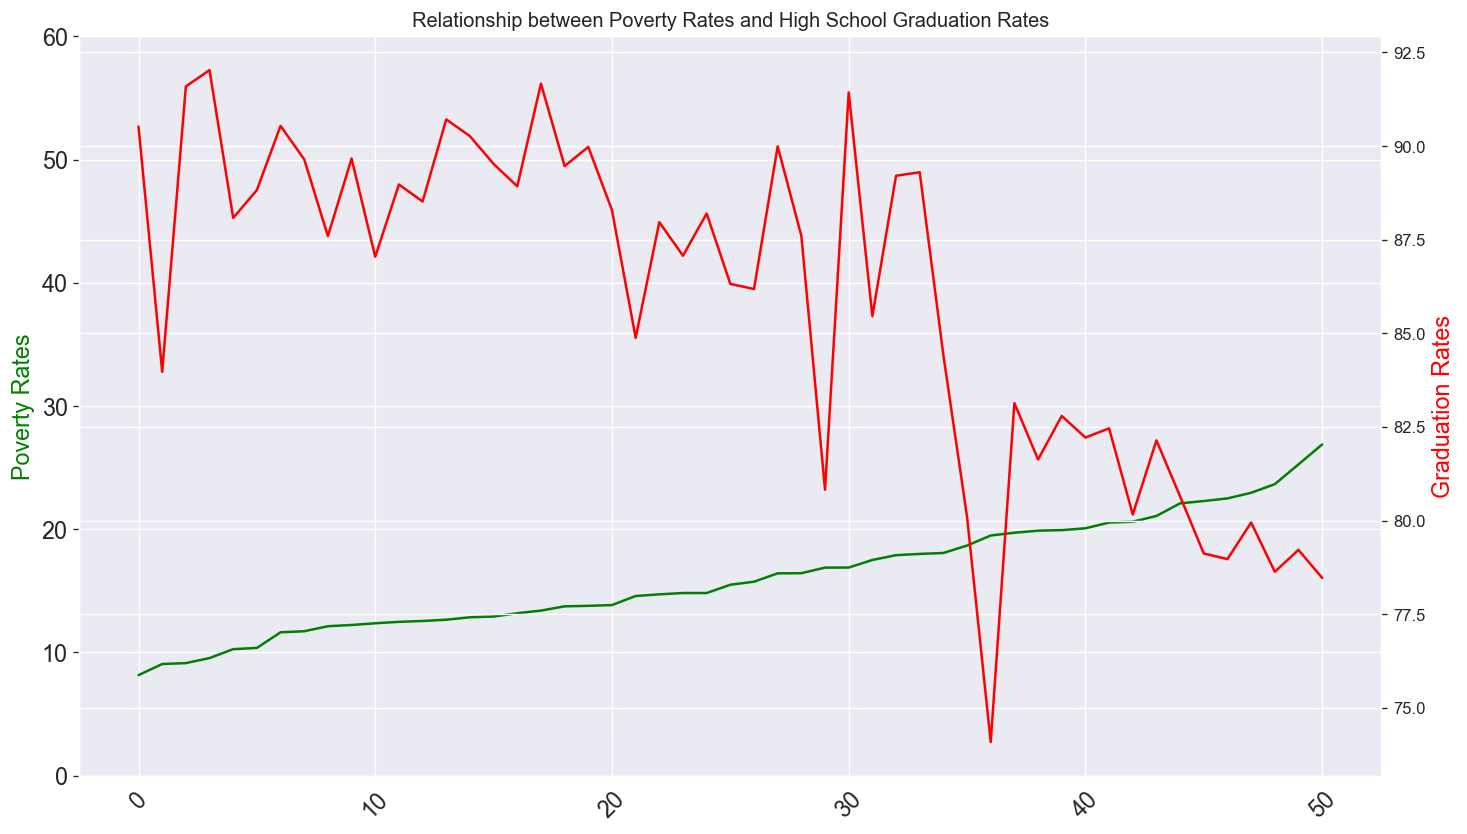

In [487]:
x = [i for i in range(51)]

plt.figure(figsize=(14,8),dpi=120)
plt.title("Relationship between Poverty Rates and High School Graduation Rates")
plt.xticks(fontsize=14,rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty Rates',color="green",fontsize=14)
ax2.set_ylabel('Graduation Rates',color="red",fontsize=14)

ax1.plot(x,poverty_and_graduation.poverty_rate,color="green")
ax2.plot(x,poverty_and_graduation.graduation_rate,color="red")

ax1.set_ylim([0, 60])


plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

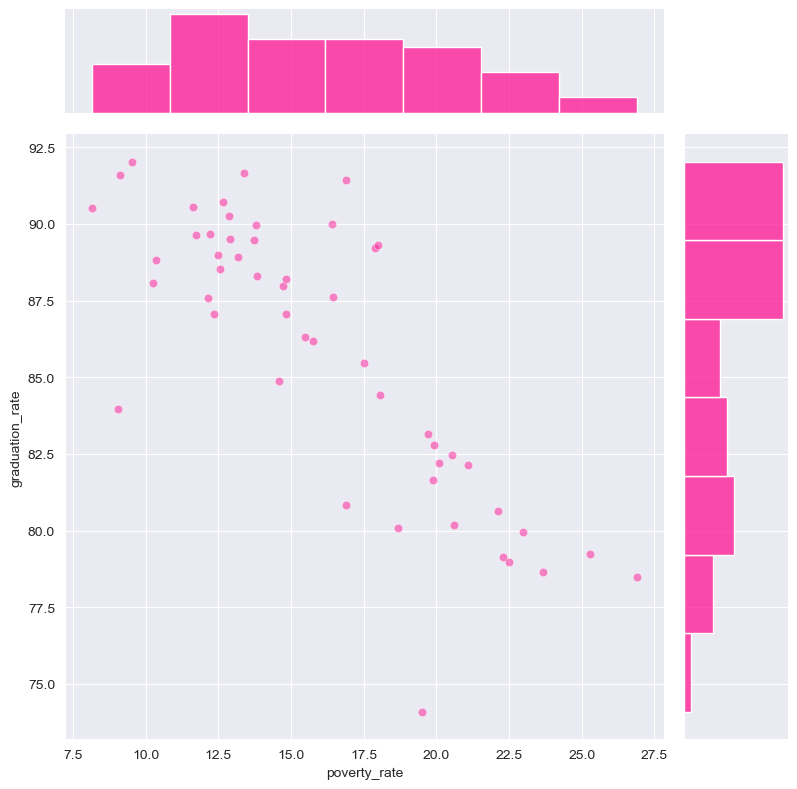

In [488]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=poverty_and_graduation['poverty_rate'], 
                y=poverty_and_graduation['graduation_rate'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Axes: xlabel='poverty_rate', ylabel='graduation_rate'>

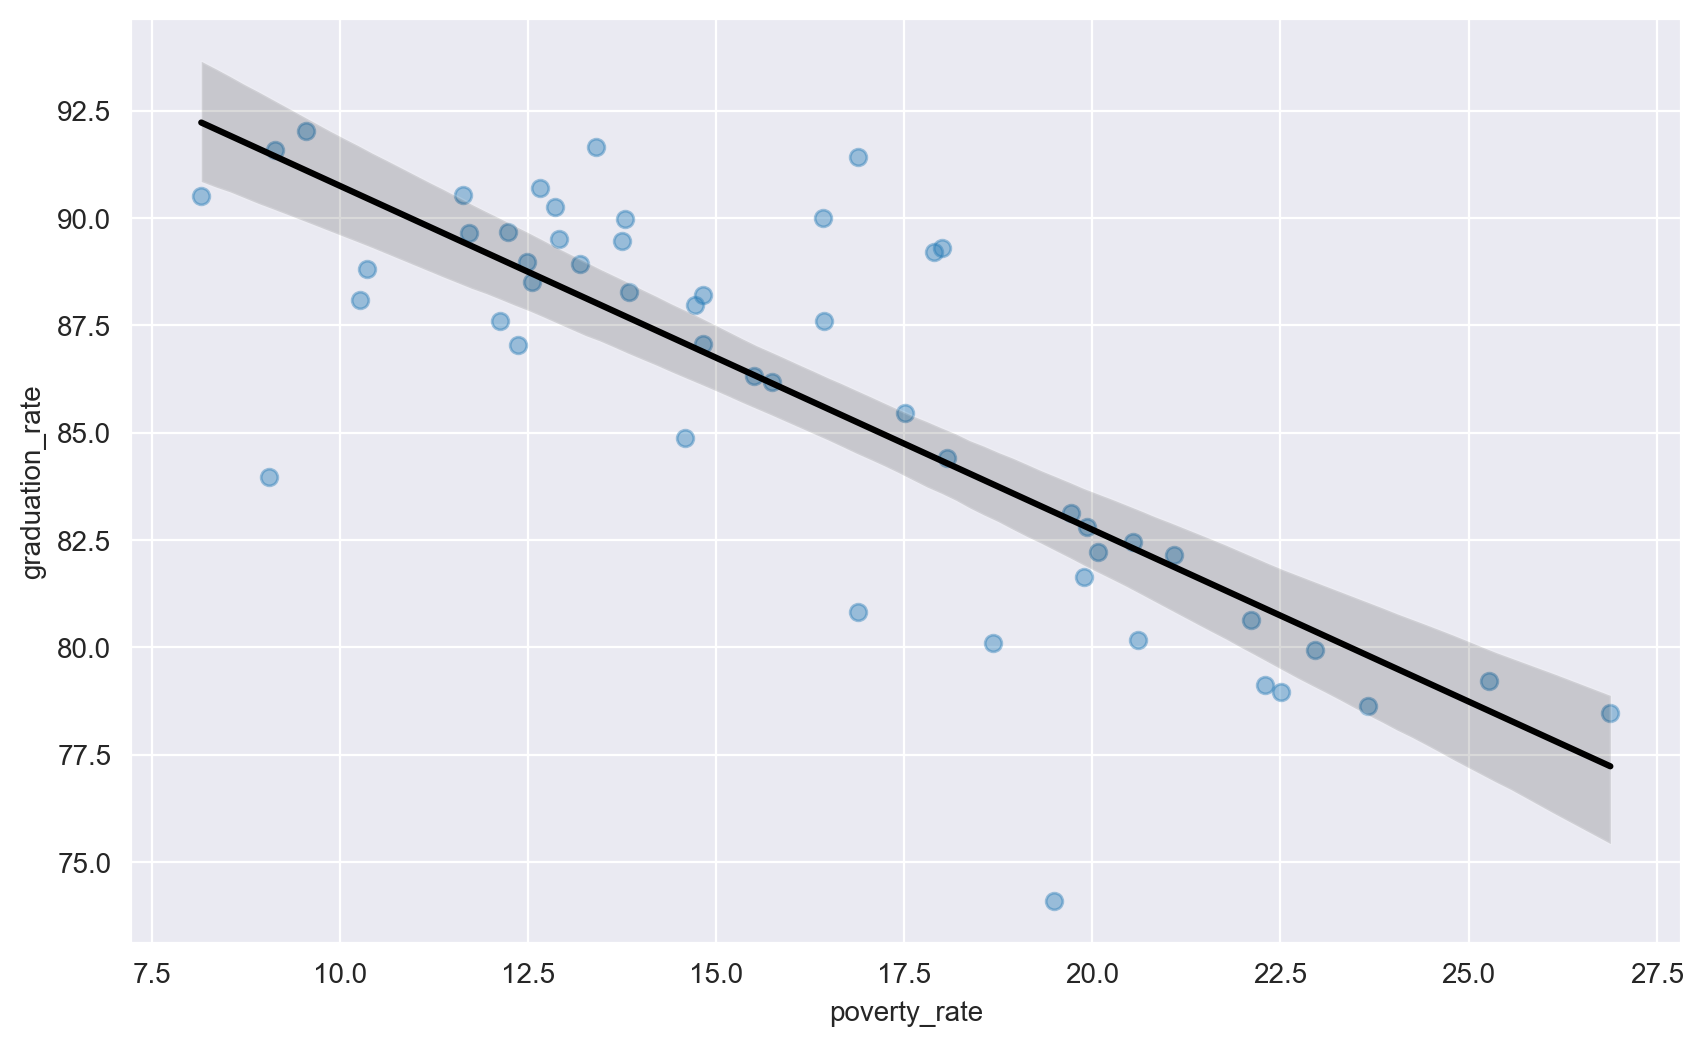

In [489]:
plt.figure(figsize=(10,6), dpi=200)

sns.set_style('darkgrid')
sns.regplot(data=poverty_and_graduation,
x='poverty_rate', 
y='graduation_rate',
scatter_kws = {'alpha': 0.4},
line_kws = {'color': 'black'}) # dot size

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [490]:
df_share_race_city = df_share_race_city.replace("(X)","0")

In [491]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [492]:
df_share_race_city.share_white = df_share_race_city.share_white.astype(float)
df_share_race_city.share_black = df_share_race_city.share_black.astype(float)
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.astype(float)
df_share_race_city.share_asian = df_share_race_city.share_asian.astype(float)
df_share_race_city.share_native_american = df_share_race_city.share_native_american.astype(float)

In [493]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [494]:
race_per_states = df_share_race_city.groupby(["Geographic area"]).agg({"share_white":"mean","share_black":"mean","share_native_american":"mean","share_hispanic":"mean","share_asian":"mean"})
race_per_states

,share_white,share_black,share_native_american,share_hispanic,share_asian
Geographic area,,,,,
AK,45.26,0.56,45.48,2.13,1.38
AL,72.51,23.32,0.66,2.98,0.48
AR,78.45,16.30,0.76,4.27,0.48
AZ,59.93,0.95,28.59,20.14,0.73
CA,71.54,2.68,1.72,29.51,5.54
CO,87.77,0.92,1.62,17.90,1.15
CT,86.11,4.99,0.66,7.98,2.99
DC,38.50,50.70,0.30,9.10,3.50
DE,76.25,15.39,0.52,7.42,2.00


In [495]:
fig = px.bar(x=race_per_states.index,
             y=[race_per_states.share_white,
                race_per_states.share_black,
                race_per_states.share_hispanic,
                race_per_states.share_asian,
                race_per_states.share_native_american],
             title=" Bar Chart with Subsections Showing the Racial Makeup of Each US State",
             color_continuous_scale='Aggrnyl')
fig.update_layout(xaxis_title='US States', yaxis_title='Race in State',coloraxis_showscale=False)
newnames ={'wide_variable_0':'White',
         'wide_variable_1':'Black',
         'wide_variable_2':'Hispanic',
         'wide_variable_3':'Asian',
         'wide_variable_4':'Native American'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [496]:
killed_by_race = df_fatalities.groupby("race").agg({"name":"count"}).sort_values(["name"])
killed_by_race

,name
race,
O,28
N,31
A,39
0,195
H,423
B,618
W,1201


In [497]:
killed_by_race_chart = px.pie(labels=killed_by_race.index,names=killed_by_race.index,values=killed_by_race.name,title="People killed by race",hole=0.6)
            
killed_by_race_chart.update_traces(textposition='outside', textinfo='percent+label')
 
killed_by_race_chart.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [498]:
killed_by_gender = df_fatalities.groupby("gender").agg({"name":"count"})
killed_by_gender

,name
gender,
F,107
M,2428


In [499]:
killed_by_gender_chart = px.pie(labels=killed_by_gender.index,names=killed_by_gender.index,values=killed_by_gender.name,title="People killed by gender",hole=0.6)
            
killed_by_gender_chart.update_traces(textposition='outside', textinfo='percent+label')
 
killed_by_gender_chart.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

<Axes: xlabel='manner_of_death', ylabel='age'>

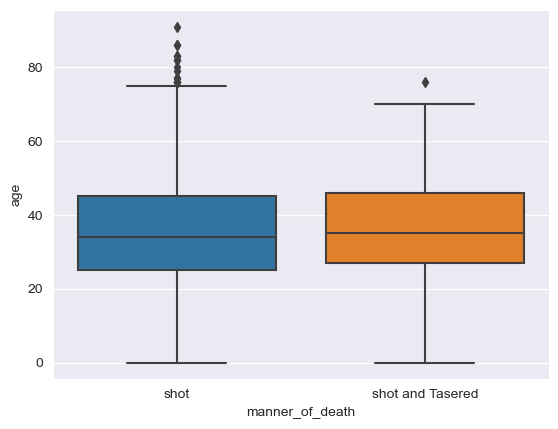

In [500]:
sns.boxplot(x=df_fatalities["manner_of_death"],y=df_fatalities["age"])

In [501]:
box = px.box(x=df_fatalities.manner_of_death,y=df_fatalities.age,color=df_fatalities.manner_of_death, notched=True,points='all',
             title='Box Plot Showing the Age and Manner of Death')
 
box.update_layout(yaxis=dict(type='log'),xaxis_title="Mannered Death",yaxis_title="Age")
 
box.show()


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [502]:
armed_or_not = np.where(df_fatalities["armed"]=="unarmed",'no','yes')
armed_or_not

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'yes'], dtype='<U3')

In [503]:
df_fatalities['armed_or_not'] = armed_or_not
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,armed_or_not
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,yes
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,yes
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,no
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,yes
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,yes
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False,yes
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False,yes
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,yes


In [504]:
armed_percent = df_fatalities.groupby("armed_or_not").agg({"name":"count"})
armed_percent

,name
armed_or_not,
no,171
yes,2364


In [505]:
length = len(df_fatalities)
length

2535

In [506]:
armed_percent['percentage'] = armed_percent.name/length*100
armed_percent

,name,percentage
armed_or_not,,
no,171,6.75
yes,2364,93.25


In [507]:
gun_vs_unarmed = df_fatalities[(df_fatalities['armed'] =="gun") | (df_fatalities['armed']=='unarmed')]
gun_vs_unarmed

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,armed_or_not
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,yes
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,yes
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,no
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.00,M,W,Guthrie,OK,False,attack,Not fleeing,False,yes
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.00,M,H,Chandler,AZ,False,attack,Car,False,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,2806,TK TK,26/07/17,shot,gun,0.00,M,0,San Antonio,TX,False,attack,Not fleeing,False,yes
2524,2816,Jerauld Phillip Hammond II,27/07/17,shot,gun,46.00,M,0,Los Angeles,CA,False,other,Not fleeing,False,yes
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False,yes
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,yes


In [508]:
count_of_gun_vs_unarmed = gun_vs_unarmed.groupby("armed").agg({"name":"count"})
count_of_gun_vs_unarmed

,name
armed,
gun,1398
unarmed,171


In [509]:
kind_of_weapons = df_fatalities.groupby(["gender","armed"],as_index=False).agg({"name":"count"})
kind_of_weapons

,gender,armed,name
0,F,ax,1
1,F,baseball bat,1
2,F,gun,50
3,F,hammer,1
4,F,hatchet,1
...,...,...,...
76,M,toy weapon,97
77,M,unarmed,160
78,M,undetermined,115
79,M,unknown weapon,17


In [510]:
fig = px.sunburst(path=[kind_of_weapons.gender,kind_of_weapons.armed], values=killed_with_armed.name)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [511]:
under_25_yes_or_no = np.where(df_fatalities["age"]<25,'yes','no')
under_25_yes_or_no

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype='<U3')

In [512]:
df_fatalities['Age_below_25'] = under_25_yes_or_no
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,armed_or_not,Age_below_25
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,yes,no
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,yes,no
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,no,yes
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,yes,no
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,yes,no
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False,yes,yes
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False,yes,no
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,yes,no


In [513]:
people_killed_perct = df_fatalities.groupby("Age_below_25").agg({"name":"count"})
people_killed_perct

,name
Age_below_25,
no,2008
yes,527


In [514]:
length = df_fatalities.shape[0]
length

2535

In [515]:
people_killed_perct['percentage'] = people_killed_perct/length*100
people_killed_perct

,name,percentage
Age_below_25,,
no,2008,79.21
yes,527,20.79


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

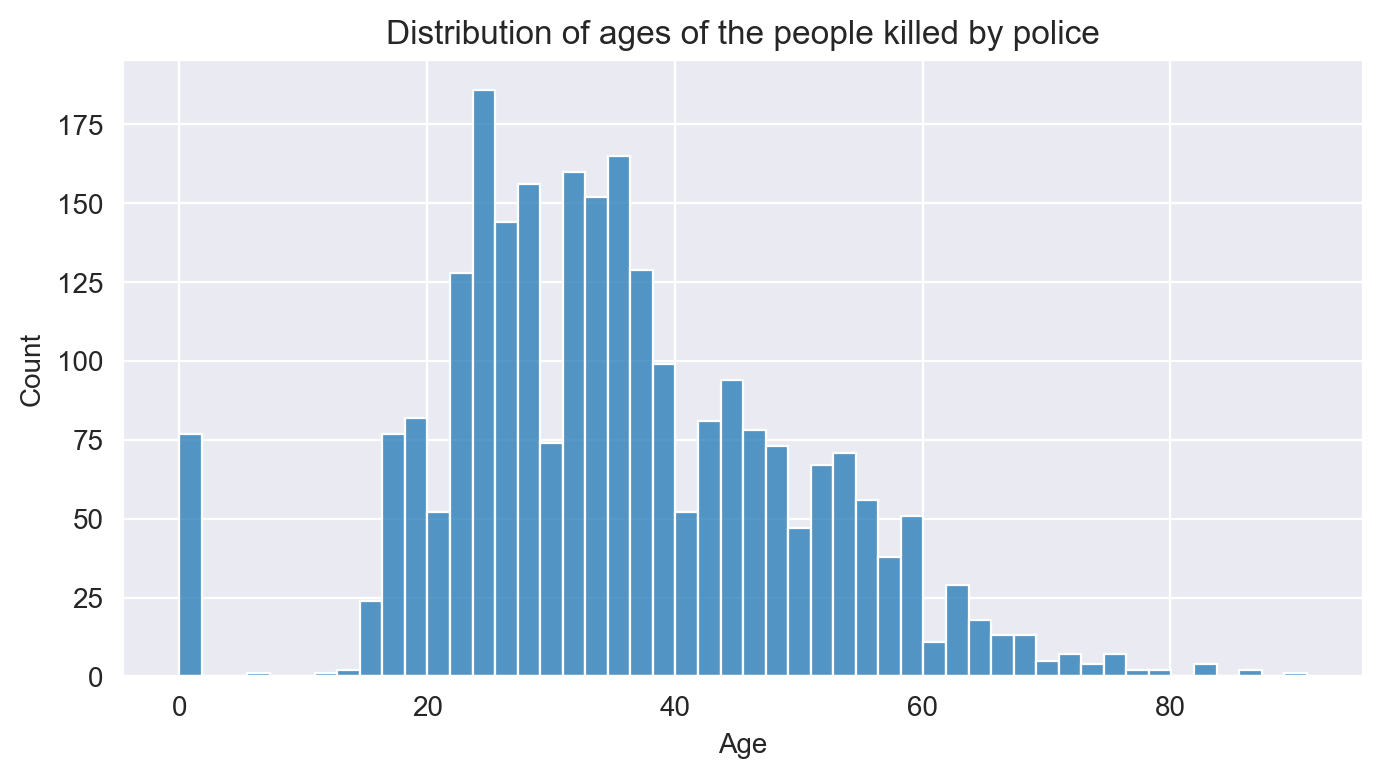

In [516]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_fatalities,
             x=df_fatalities.age,
             bins=50,)
plt.xlabel('Age')
plt.title('Distribution of ages of the people killed by police')
plt.show()

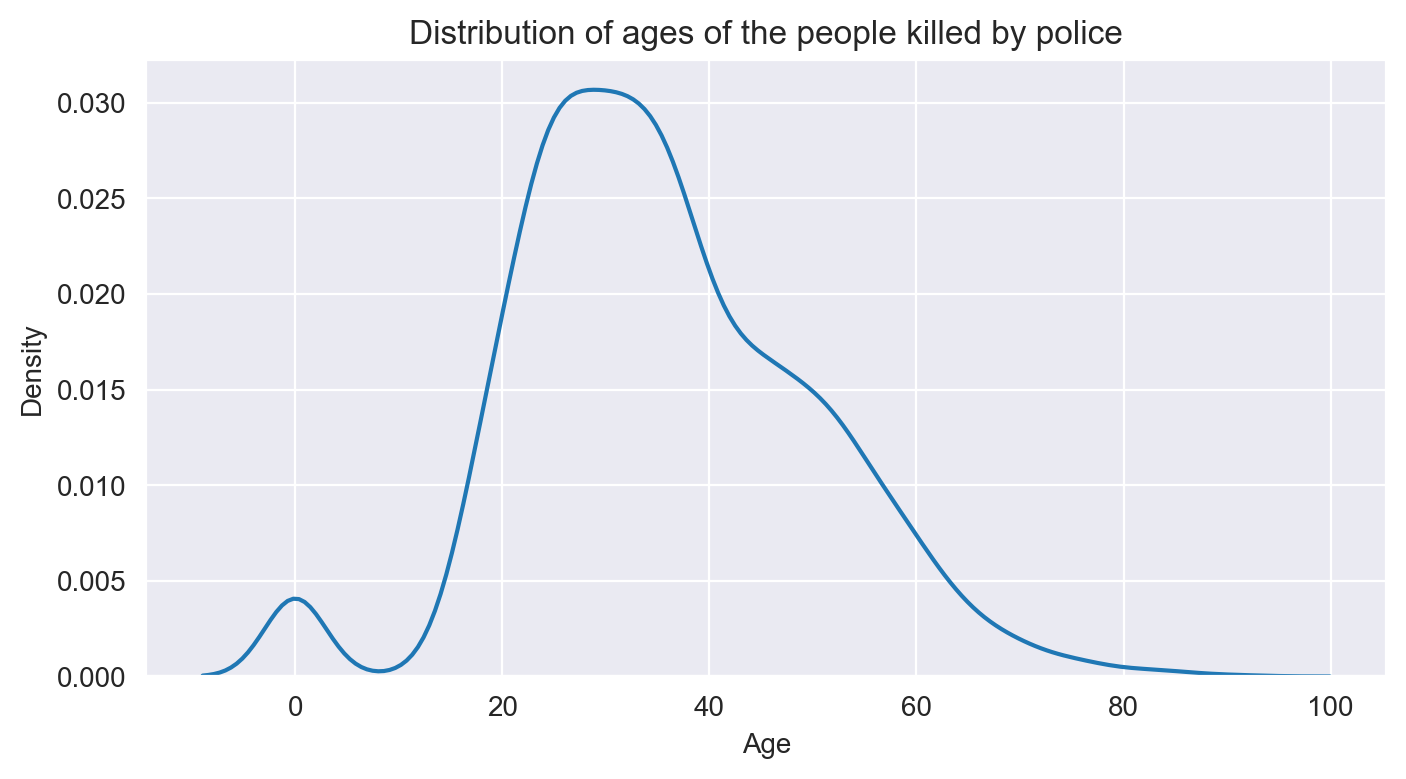

In [517]:
plt.figure(figsize=(8, 4), dpi=200)
sns.kdeplot(data=df_fatalities,
             x=df_fatalities.age)
plt.xlabel('Age')
plt.title('Distribution of ages of the people killed by police')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [518]:
killed_by_race

,name
race,
O,28
N,31
A,39
0,195
H,423
B,618
W,1201


In [519]:
df_fatalities_white = df_fatalities[df_fatalities["race"]=="W"]
df_fatalities_black = df_fatalities[df_fatalities["race"]=="B"]
df_fatalities_asian = df_fatalities[df_fatalities["race"]=="A"]
df_fatalities_hispanic = df_fatalities[df_fatalities["race"]=="H"]
df_fatalities_native_american = df_fatalities[df_fatalities["race"]=="N"]
df_fatalities_other = df_fatalities[df_fatalities["race"]=="O"]

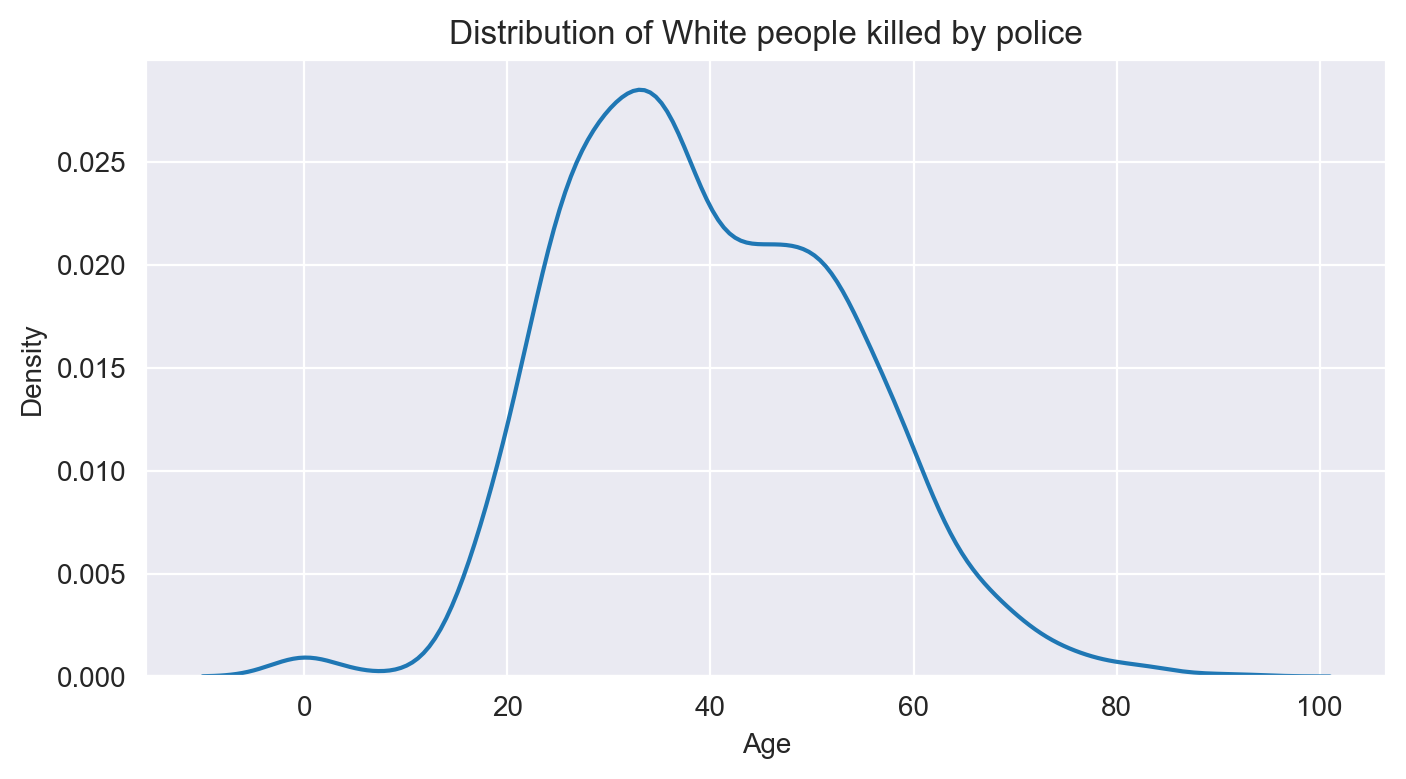

In [520]:
plt.figure(figsize=(8, 4), dpi=200)
sns.kdeplot(x=df_fatalities_white.age)
plt.xlabel('Age')
plt.title('Distribution of White people killed by police')
plt.show()

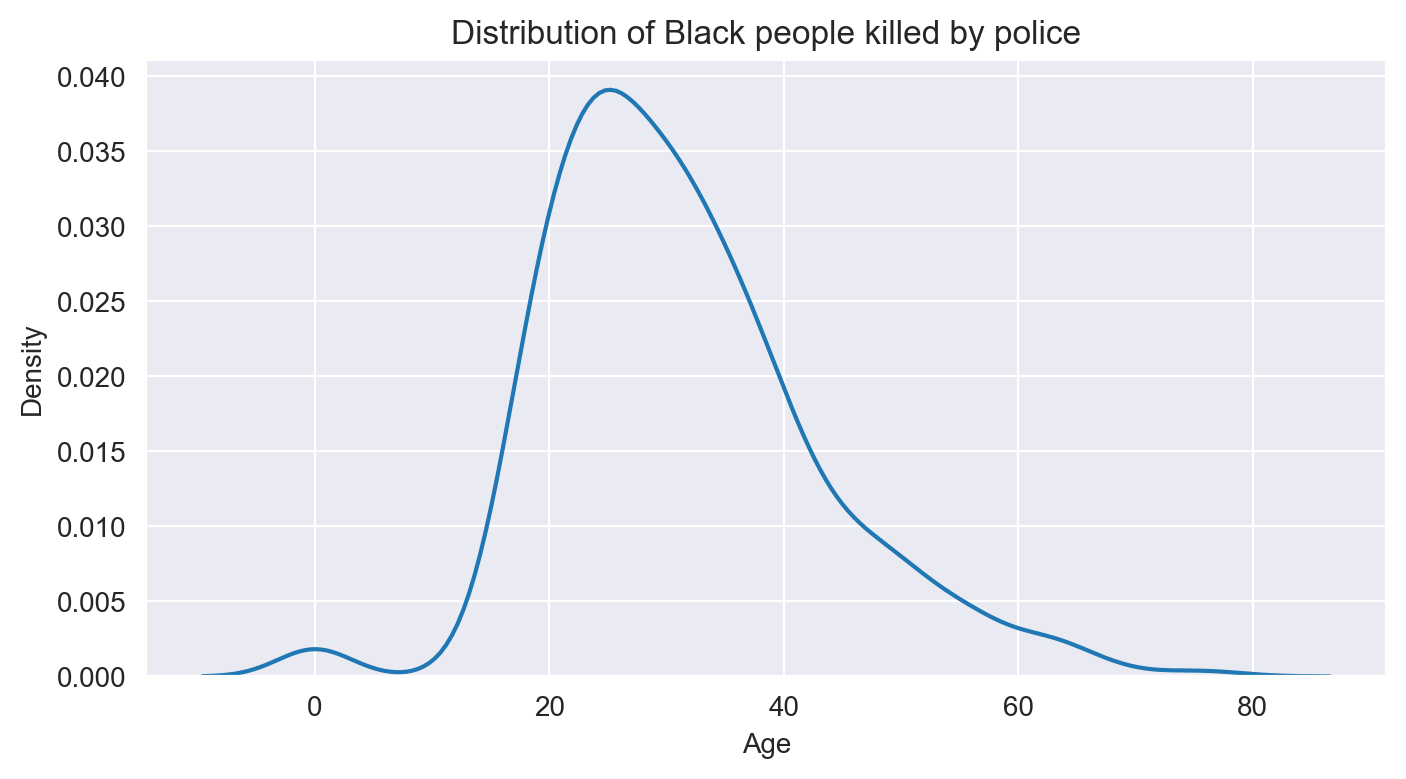

In [521]:
plt.figure(figsize=(8, 4), dpi=200)
sns.kdeplot(x=df_fatalities_black.age)
plt.xlabel('Age')
plt.title('Distribution of Black people killed by police')
plt.show()

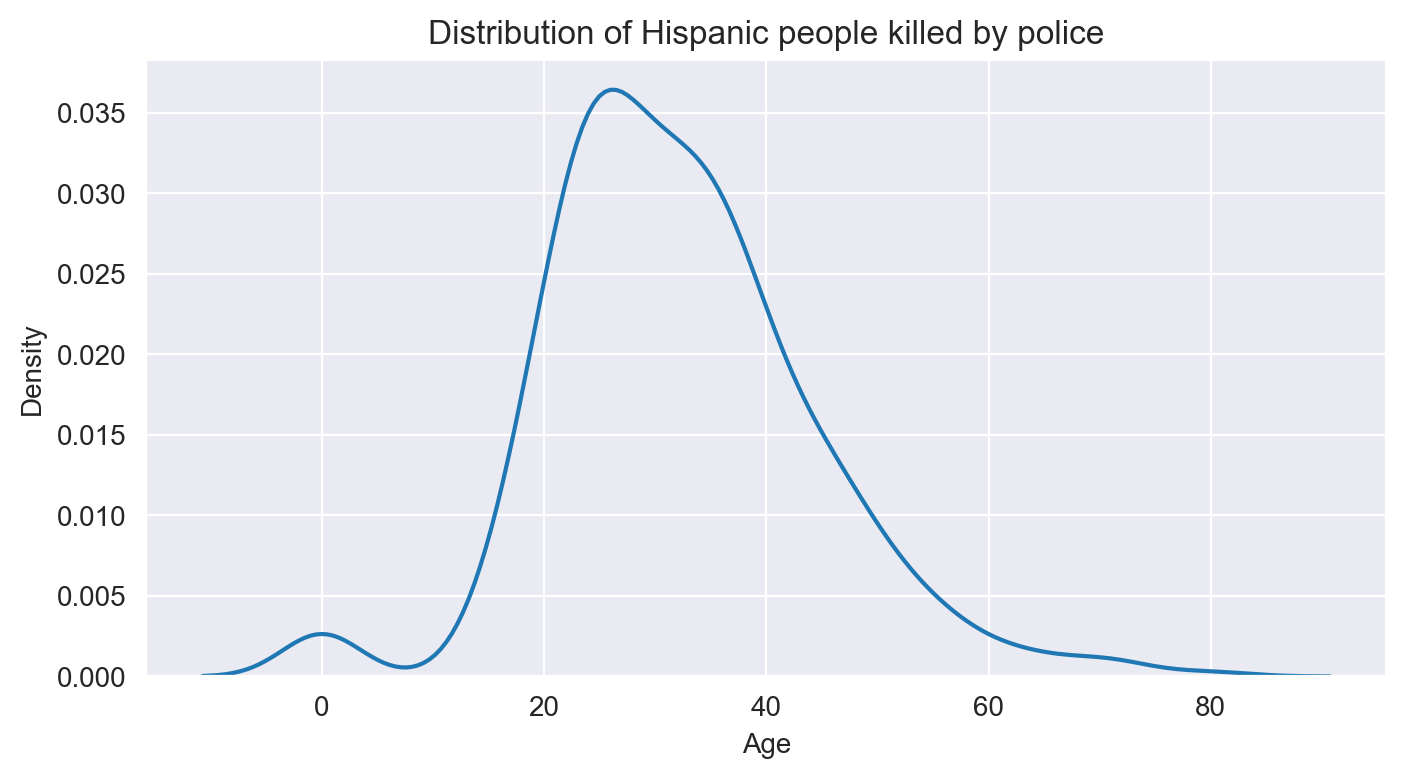

In [522]:
plt.figure(figsize=(8, 4), dpi=200)
sns.kdeplot(x=df_fatalities_hispanic.age)
plt.xlabel('Age')
plt.title('Distribution of Hispanic people killed by police')
plt.show()

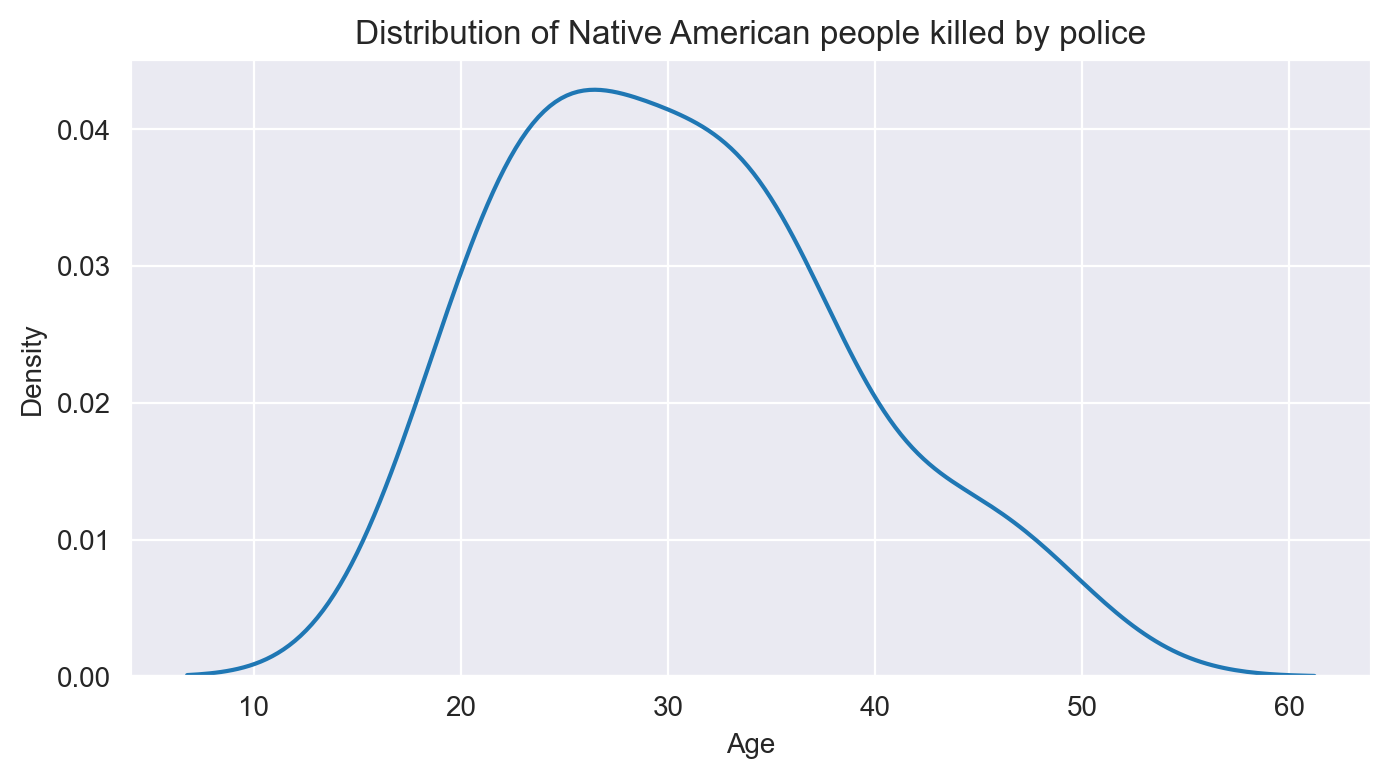

In [523]:
plt.figure(figsize=(8, 4), dpi=200)
sns.kdeplot(x=df_fatalities_native_american.age)
plt.xlabel('Age')
plt.title('Distribution of Native American people killed by police')
plt.show()

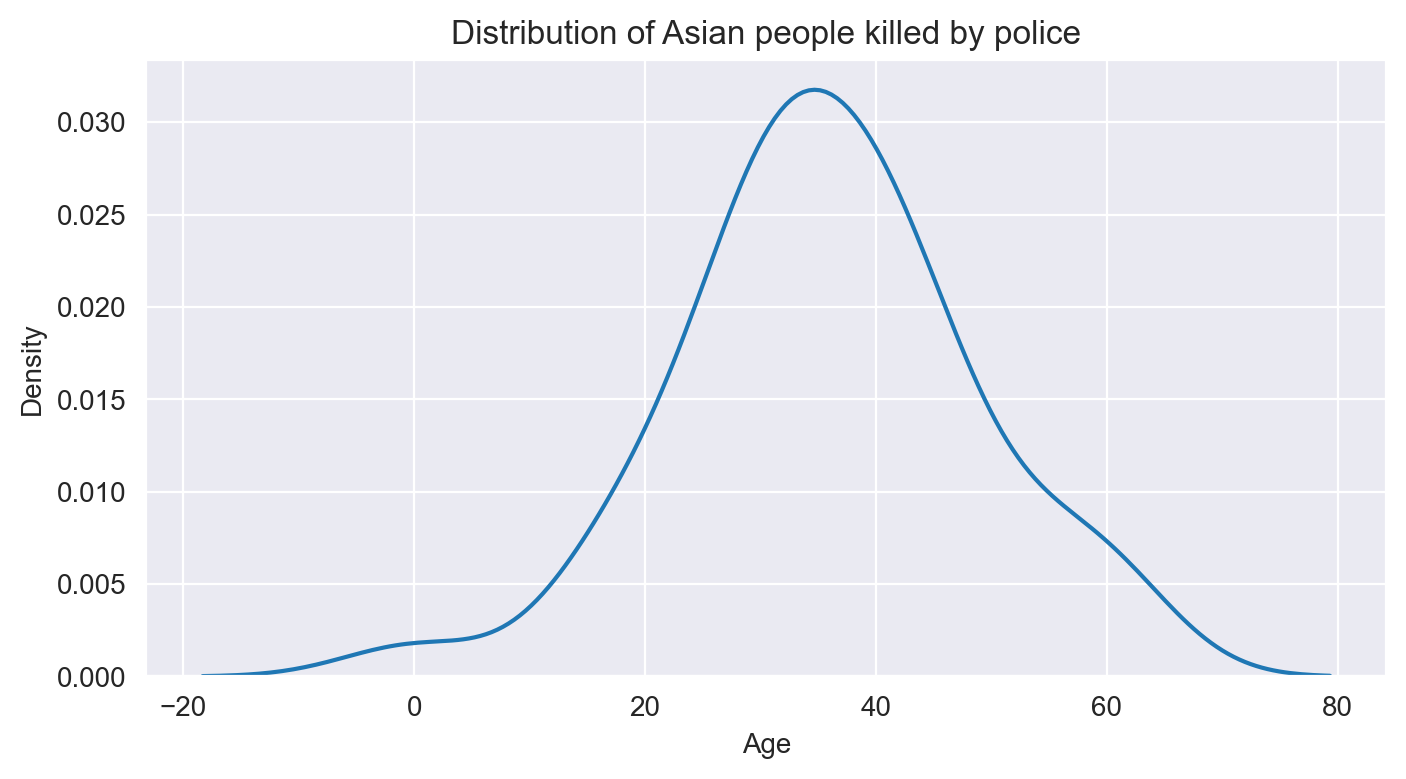

In [524]:
plt.figure(figsize=(8, 4), dpi=200)
sns.kdeplot(x=df_fatalities_asian.age)
plt.xlabel('Age')
plt.title('Distribution of Asian people killed by police')
plt.show()

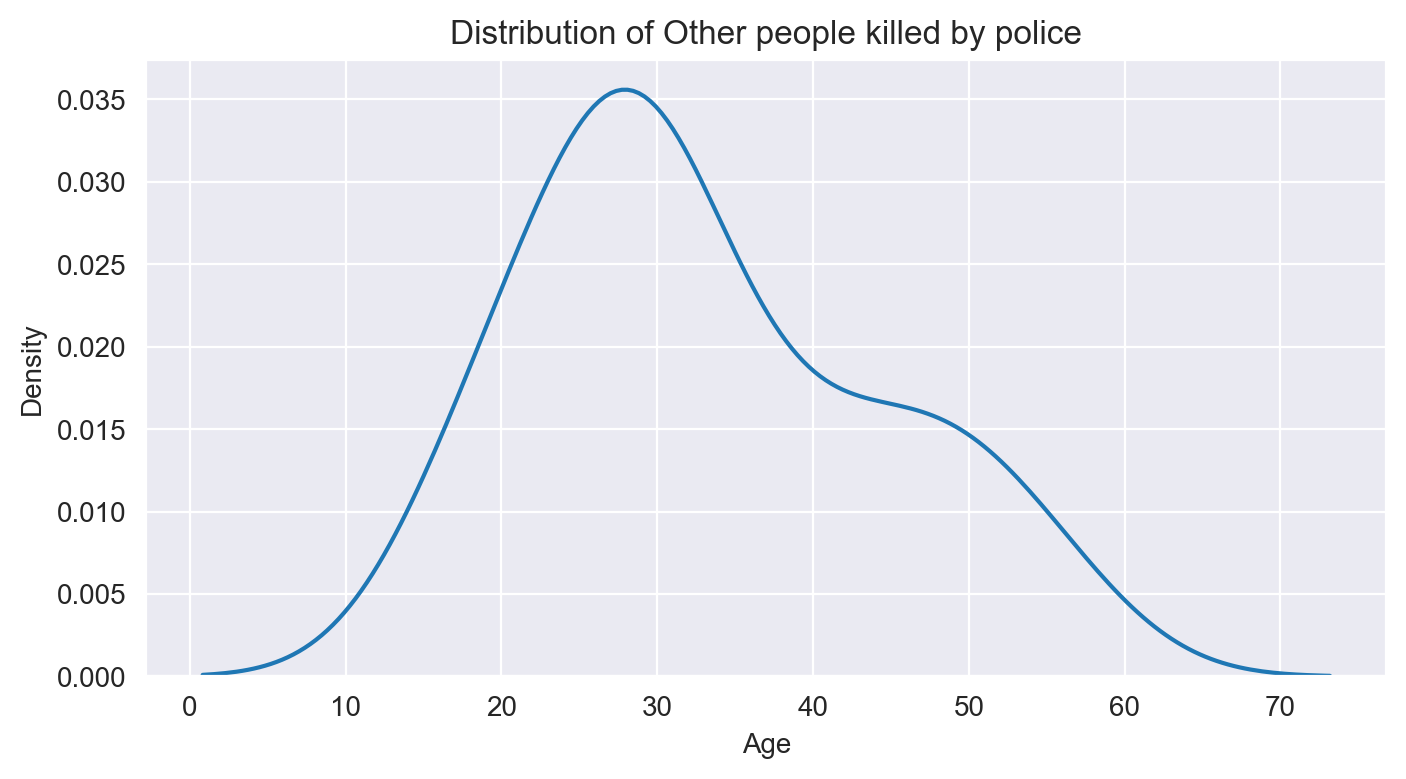

In [525]:
plt.figure(figsize=(8, 4), dpi=200)
sns.kdeplot(x=df_fatalities_other.age)
plt.xlabel('Age')
plt.title('Distribution of Other people killed by police')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [526]:
bar = px.bar(x = killed_by_race.index, y = killed_by_race.name,title='Race of People Killed',color_continuous_scale='Agsunset',hover_name=killed_by_race.name,color=killed_by_race.name)
 
bar.update_layout(xaxis_title='Race',yaxis_title='Death Count',coloraxis_showscale=False)
 
bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [527]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,armed_or_not,Age_below_25
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,yes,no
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,yes,no
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,no,yes
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,yes,no
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False,yes,no
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False,yes,yes
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False,yes,no
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,yes,no


In [528]:
signs_of_mental_illness_killed = df_fatalities.groupby(["signs_of_mental_illness"]).agg({"signs_of_mental_illness":"count"})
signs_of_mental_illness_killed

,signs_of_mental_illness
signs_of_mental_illness,
False,1902
True,633


In [529]:
total = df_fatalities.shape[0]
total

2535

In [530]:
signs_of_mental_illness_killed["percentage"] = (signs_of_mental_illness_killed.signs_of_mental_illness/total)*100

In [531]:
signs_of_mental_illness_killed

,signs_of_mental_illness,percentage
signs_of_mental_illness,,
False,1902,75.03
True,633,24.97


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [549]:
police_killing_per_city = df_fatalities.groupby(["state","city"],as_index=False).agg({"name":"count"}).sort_values(["name"],ascending=False)
police_killing_per_city

,state,city,name
218,CA,Los Angeles,39
94,AZ,Phoenix,31
1314,TX,Houston,26
561,IL,Chicago,25
990,NV,Las Vegas,21
...,...,...,...
713,MA,Spencer,1
712,MA,Roslindale,1
711,MA,Oxford,1
187,CA,Grover Beach,1


In [550]:
bar = px.bar(x = police_killing_per_city.city[:10], y = police_killing_per_city.name[:10],title='Top 10 Cities of Police Killing',color_continuous_scale='Agsunset',hover_name=police_killing_per_city.name[:10],color=police_killing_per_city.name[:10])
 
bar.update_layout(xaxis_title='Race',yaxis_title='Death Count',coloraxis_showscale=False)
 
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [645]:
police_killing_per_city_top_10 = df_fatalities.groupby(["state","city"],as_index=False).agg({"name":"count"}).sort_values(["name"],ascending=False)[:10]
police_killing_per_city_top_10.reset_index(inplace=True)
police_killing_per_city_top_10

,index,state,city,name
0,218,CA,Los Angeles,39
1,94,AZ,Phoenix,31
2,1314,TX,Houston,26
3,561,IL,Chicago,25
4,990,NV,Las Vegas,21
5,1360,TX,San Antonio,20
6,426,FL,Miami,17
7,1034,OH,Columbus,17
8,1274,TX,Austin,16
9,840,MO,St. Louis,15


In [646]:
column = []
row = []
for i in range(0,len(police_killing_per_city_top_10)):
    a = df_share_race_city[(df_share_race_city['Geographic area']==police_killing_per_city_top_10.state[i]) & (df_share_race_city['City'] == f'{police_killing_per_city_top_10.city[i]} city')]
    column.append(a.columns)
    row.append(a.values)


In [647]:
new_data = pd.DataFrame([row[0][0],row[1][0],row[2][0],row[3][0],row[4][0],row[5][0],row[6][0],row[7][0],row[8][0],row[9][0]],
                        columns=column[0])

In [648]:
new_data

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50
1,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80
2,TX,Houston city,50.50,23.70,0.70,6.00,43.80
3,IL,Chicago city,45.00,32.90,0.50,5.50,28.90
4,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50
5,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20
6,FL,Miami city,72.60,19.20,0.30,1.00,70.00
7,OH,Columbus city,61.50,28.00,0.30,4.10,5.60
8,TX,Austin city,68.30,8.10,0.90,6.30,35.10
9,MO,St. Louis city,43.90,49.20,0.30,2.90,3.50


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [535]:
police_killings_per_state = df_fatalities.groupby(["state"]).agg({"name":"count"})
police_killings_per_state

,name
state,
AK,15
AL,50
AR,26
AZ,118
CA,424
CO,74
CT,9
DC,11
DE,8


In [536]:
fig = px.choropleth(locations=police_killings_per_state.index, color=police_killings_per_state.name,hover_name=police_killings_per_state.index, locationmode="USA-states", scope="usa",
                   color_continuous_scale=px.colors.sequential.matter,title="Police Killings by US State")
 
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [537]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

C:\Users\aezhi\AppData\Local\Temp\ipykernel_10900\1103991209.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [538]:
df_fatalities.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2535 non-null   object        
 5   age                      2535 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2535 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2535 non-

In [539]:
police_killings_over_time = df_fatalities.groupby(["date"],as_index=False).agg({"name":"count"})
police_killings_over_time

,date,name
0,2015-01-03,3
1,2015-01-04,2
2,2015-01-06,1
3,2015-01-07,2
4,2015-01-08,2
...,...,...
874,2017-12-03,2
875,2017-12-04,1
876,2017-12-05,4
877,2017-12-06,4


In [540]:
police_killings_over_time["Year"] = police_killings_over_time.date.dt.year
police_killings_over_time

,date,name,Year
0,2015-01-03,3,2015
1,2015-01-04,2,2015
2,2015-01-06,1,2015
3,2015-01-07,2,2015
4,2015-01-08,2,2015
...,...,...,...
874,2017-12-03,2,2017
875,2017-12-04,1,2017
876,2017-12-05,4,2017
877,2017-12-06,4,2017


In [541]:
police_killings_over_time["Month"] = police_killings_over_time.date.dt.month
police_killings_over_time

,date,name,Year,Month
0,2015-01-03,3,2015,1
1,2015-01-04,2,2015,1
2,2015-01-06,1,2015,1
3,2015-01-07,2,2015,1
4,2015-01-08,2,2015,1
...,...,...,...,...
874,2017-12-03,2,2017,12
875,2017-12-04,1,2017,12
876,2017-12-05,4,2017,12
877,2017-12-06,4,2017,12


In [542]:
police_killings_over_time_grp = police_killings_over_time.groupby(["Year","Month"],as_index=False).agg({"name":"sum"})
police_killings_over_time_grp

,Year,Month,name
0,2015,1,70
1,2015,2,78
2,2015,3,87
3,2015,4,88
4,2015,5,85
5,2015,6,68
6,2015,7,85
7,2015,8,86
8,2015,9,90
9,2015,10,89


In [543]:
police_killings_over_time_grp["Date"] = police_killings_over_time_grp.Year.astype(str) + police_killings_over_time_grp.Month.astype(str)
police_killings_over_time_grp

,Year,Month,name,Date
0,2015,1,70,20151
1,2015,2,78,20152
2,2015,3,87,20153
3,2015,4,88,20154
4,2015,5,85,20155
5,2015,6,68,20156
6,2015,7,85,20157
7,2015,8,86,20158
8,2015,9,90,20159
9,2015,10,89,201510


In [544]:
line = px.line(x=police_killings_over_time_grp.Date,
               y=police_killings_over_time_grp.name,
               title='Number of Police Killings Over Time')
line.update_layout(xaxis_title='Date in Year-Month',yaxis_title='Death Count')
line.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).